In [41]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [15]:
originalSample=np.array([
[81,32,49,54,44,74,98,42,54,51],
[69,49,43,5,1,5,35,55,4,20],
[25,34,31,65,46,92,2,4,41,38]
])
originalSample.sort()

In [3]:
def boostrap(originalSample,n,m):
    mean=[]
    median=[]
    IQR=[]
    std_deviation=[]
    boostrapSamples=[]
    for i in range(n):     
        tempList=list(originalSample[int(originalSample.shape[0]*np.random.rand())][int(originalSample.shape[1]*np.random.rand())] for i in range(m))
        boostrapSamples.append(tempList)
        arr=tempList.copy()
        arr.sort()
        mean.append(sum(arr)/m)
        if m%2==0:
            md=(arr[int(m/2)]+arr[int(m/2)-1])/2
            IQR.append(np.median(arr[int(m/2):])-np.median(arr[:int(m/2)]))
        else:
            md=arr[int(m/2)]
            IQR.append(np.median(arr[int(m/2)+1:])-np.median(arr[:int(m/2)]))
        median.append(md)     
        std_deviation.append(np.std(arr)) 
    Bin=[10,20,30,40,50,60,70,80,90,100]
    Frequency=[]
    Probability=[]
    for value in Bin:
        Frequency.append(len([i for i in mean if (i>=value-10) and (i<value)]))
        Probability.append(round(Frequency[Bin.index(value)]/200,2))
    meanDistribution=pd.DataFrame({"Bin":Bin,"Frequency":Frequency,"Probability":Probability})
    bootstrapStatistic=pd.DataFrame({"Mean":mean,"Median":median,"IQR":IQR,"std deviation":std_deviation}) 
    return boostrapSamples,meanDistribution,bootstrapStatistic

In [4]:
boostrapSamples,meanDistribution,bootstrapStatistic=boostrap(originalSample,200,10)

In [5]:
meanDistribution

,Bin,Frequency,Probability
0,10,0,0.00
1,20,0,0.00
2,30,13,0.07
3,40,74,0.37
4,50,85,0.42
5,60,25,0.12
6,70,3,0.01
7,80,0,0.00
8,90,0,0.00
9,100,0,0.00


In [6]:
bootstrapStatistic

,Mean,Median,IQR,std deviation
0,39.2,45.0,16.0,19.363884
1,30.3,25.5,39.0,26.977954
2,47.5,54.5,17.0,26.837474
3,39.4,36.0,17.0,25.699027
4,34.5,38.5,45.0,29.506779
...,...,...,...,...
195,38.1,44.5,23.0,20.997381
196,44.7,41.0,70.0,36.417166
197,40.6,43.5,49.0,30.774015
198,45.1,48.5,44.0,25.489017


In [7]:
boostrapSamples

[[51, 5, 51, 44, 35, 46, 51, 5, 69, 35],
 [44, 42, 81, 69, 5, 5, 31, 1, 5, 20],
 [2, 55, 44, 5, 98, 38, 69, 54, 55, 55],
 [32, 5, 34, 49, 1, 34, 38, 98, 54, 49],
 [92, 42, 49, 44, 4, 35, 1, 5, 69, 4],
 [31, 25, 51, 4, 5, 2, 34, 25, 98, 31],
 [44, 55, 35, 51, 42, 74, 46, 32, 74, 98],
 [41, 5, 5, 42, 51, 49, 35, 98, 1, 32],
 [65, 81, 4, 49, 98, 25, 51, 54, 38, 46],
 [34, 25, 42, 46, 38, 65, 42, 65, 49, 34],
 [35, 69, 5, 65, 65, 25, 25, 65, 69, 25],
 [74, 43, 69, 69, 74, 43, 32, 49, 92, 34],
 [81, 38, 1, 46, 4, 20, 51, 51, 34, 51],
 [65, 42, 54, 49, 41, 32, 69, 1, 25, 43],
 [38, 54, 51, 41, 4, 5, 54, 41, 5, 49],
 [42, 4, 54, 49, 43, 49, 31, 38, 31, 49],
 [49, 98, 38, 4, 32, 49, 20, 44, 1, 54],
 [69, 55, 49, 34, 1, 42, 35, 69, 46, 20],
 [4, 81, 69, 1, 51, 46, 41, 92, 5, 32],
 [65, 31, 54, 25, 34, 34, 98, 44, 5, 38],
 [38, 74, 54, 46, 34, 98, 51, 2, 42, 2],
 [5, 25, 4, 65, 43, 20, 65, 34, 2, 74],
 [43, 2, 54, 32, 41, 49, 20, 4, 69, 54],
 [41, 4, 55, 51, 35, 31, 46, 25, 98, 34],
 [46, 54, 65

<AxesSubplot:xlabel='Bin', ylabel='Probability'>

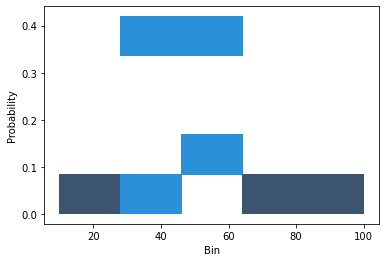

In [54]:
sns.histplot(data = meanDistribution, x = "Bin",y="Probability")

<AxesSubplot:xlabel='Bin', ylabel='Frequency'>

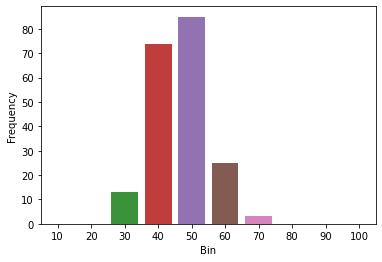

In [59]:
sns.barplot(x="Bin",y="Frequency",data=meanDistribution)

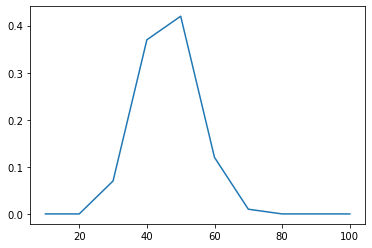

In [60]:

plt.plot(meanDistribution["Bin"],meanDistribution["Probability"])

<AxesSubplot:xlabel='Bin', ylabel='Probability'>

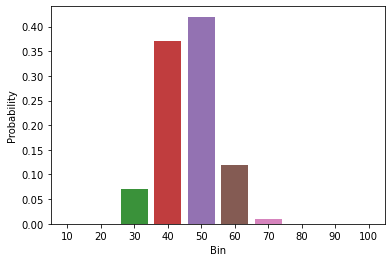

In [58]:
sns.barplot(x="Bin",y="Probability",data=meanDistribution)

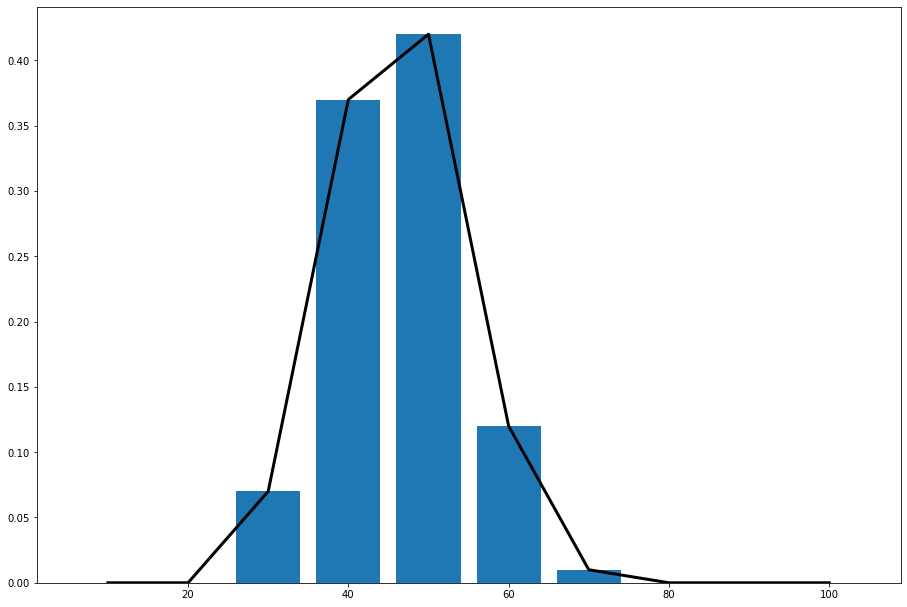

In [99]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_axes([0,0,1,1])
ax.plot(meanDistribution["Bin"],meanDistribution["Probability"],"black",lw=3)
ax.bar(meanDistribution["Bin"],meanDistribution["Probability"],width=8)
plt.show()